In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch


In [2]:
def exp_maker(sorter, seed):
    return f"sorter-{sorter}-lr-0.0005-B-64-seed-{seed}"


In [3]:
d_sorts = ["CD-GraB", "D-RR"]


In [7]:
results = {s: [] for s in d_sorts}

for s in d_sorts:
    for seed in range(3):
        exp_details = exp_maker(s, seed)
        exp_folder = f"..{os.sep}..{os.sep}results{os.sep}gpt2-wiki103-simulated{os.sep}{exp_details}"
        r = torch.load(f"{exp_folder}{os.sep}results-{30}.pt", map_location='cpu')
        results[s].append(r)


In [8]:
def down_sampling(len_sampling, data):
    start = 0
    end = len_sampling
    len_data = len(data)
    ret = []
    while end <= len_data:
        data_chunk = data[start:end]
        start += len_sampling
        end += len_sampling
        ret.append(torch.mean(torch.as_tensor(data_chunk)))
    return torch.as_tensor(ret)


In [9]:
def plot_res(ax, s, label, train_test, loss_ppl):
    res = []
    for arr in results[s]:
        res.append(torch.tensor(arr[train_test][loss_ppl]))
    res = torch.vstack(res).numpy()
    # xaxis = np.cumsum(time_results[s].mean(axis=0)/1000)
    mean = res.mean(axis=0)
    std = res.std(axis=0)
    min = res.min(axis=0)
    max = res.max(axis=0)
    ax.plot(np.arange(1, res.shape[1] + 1), mean, label=label, markersize=5)
    ax.fill_between(np.arange(1, res.shape[1] + 1), min, max, alpha=0.3)


/tmp/ipykernel_566101/360560593.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


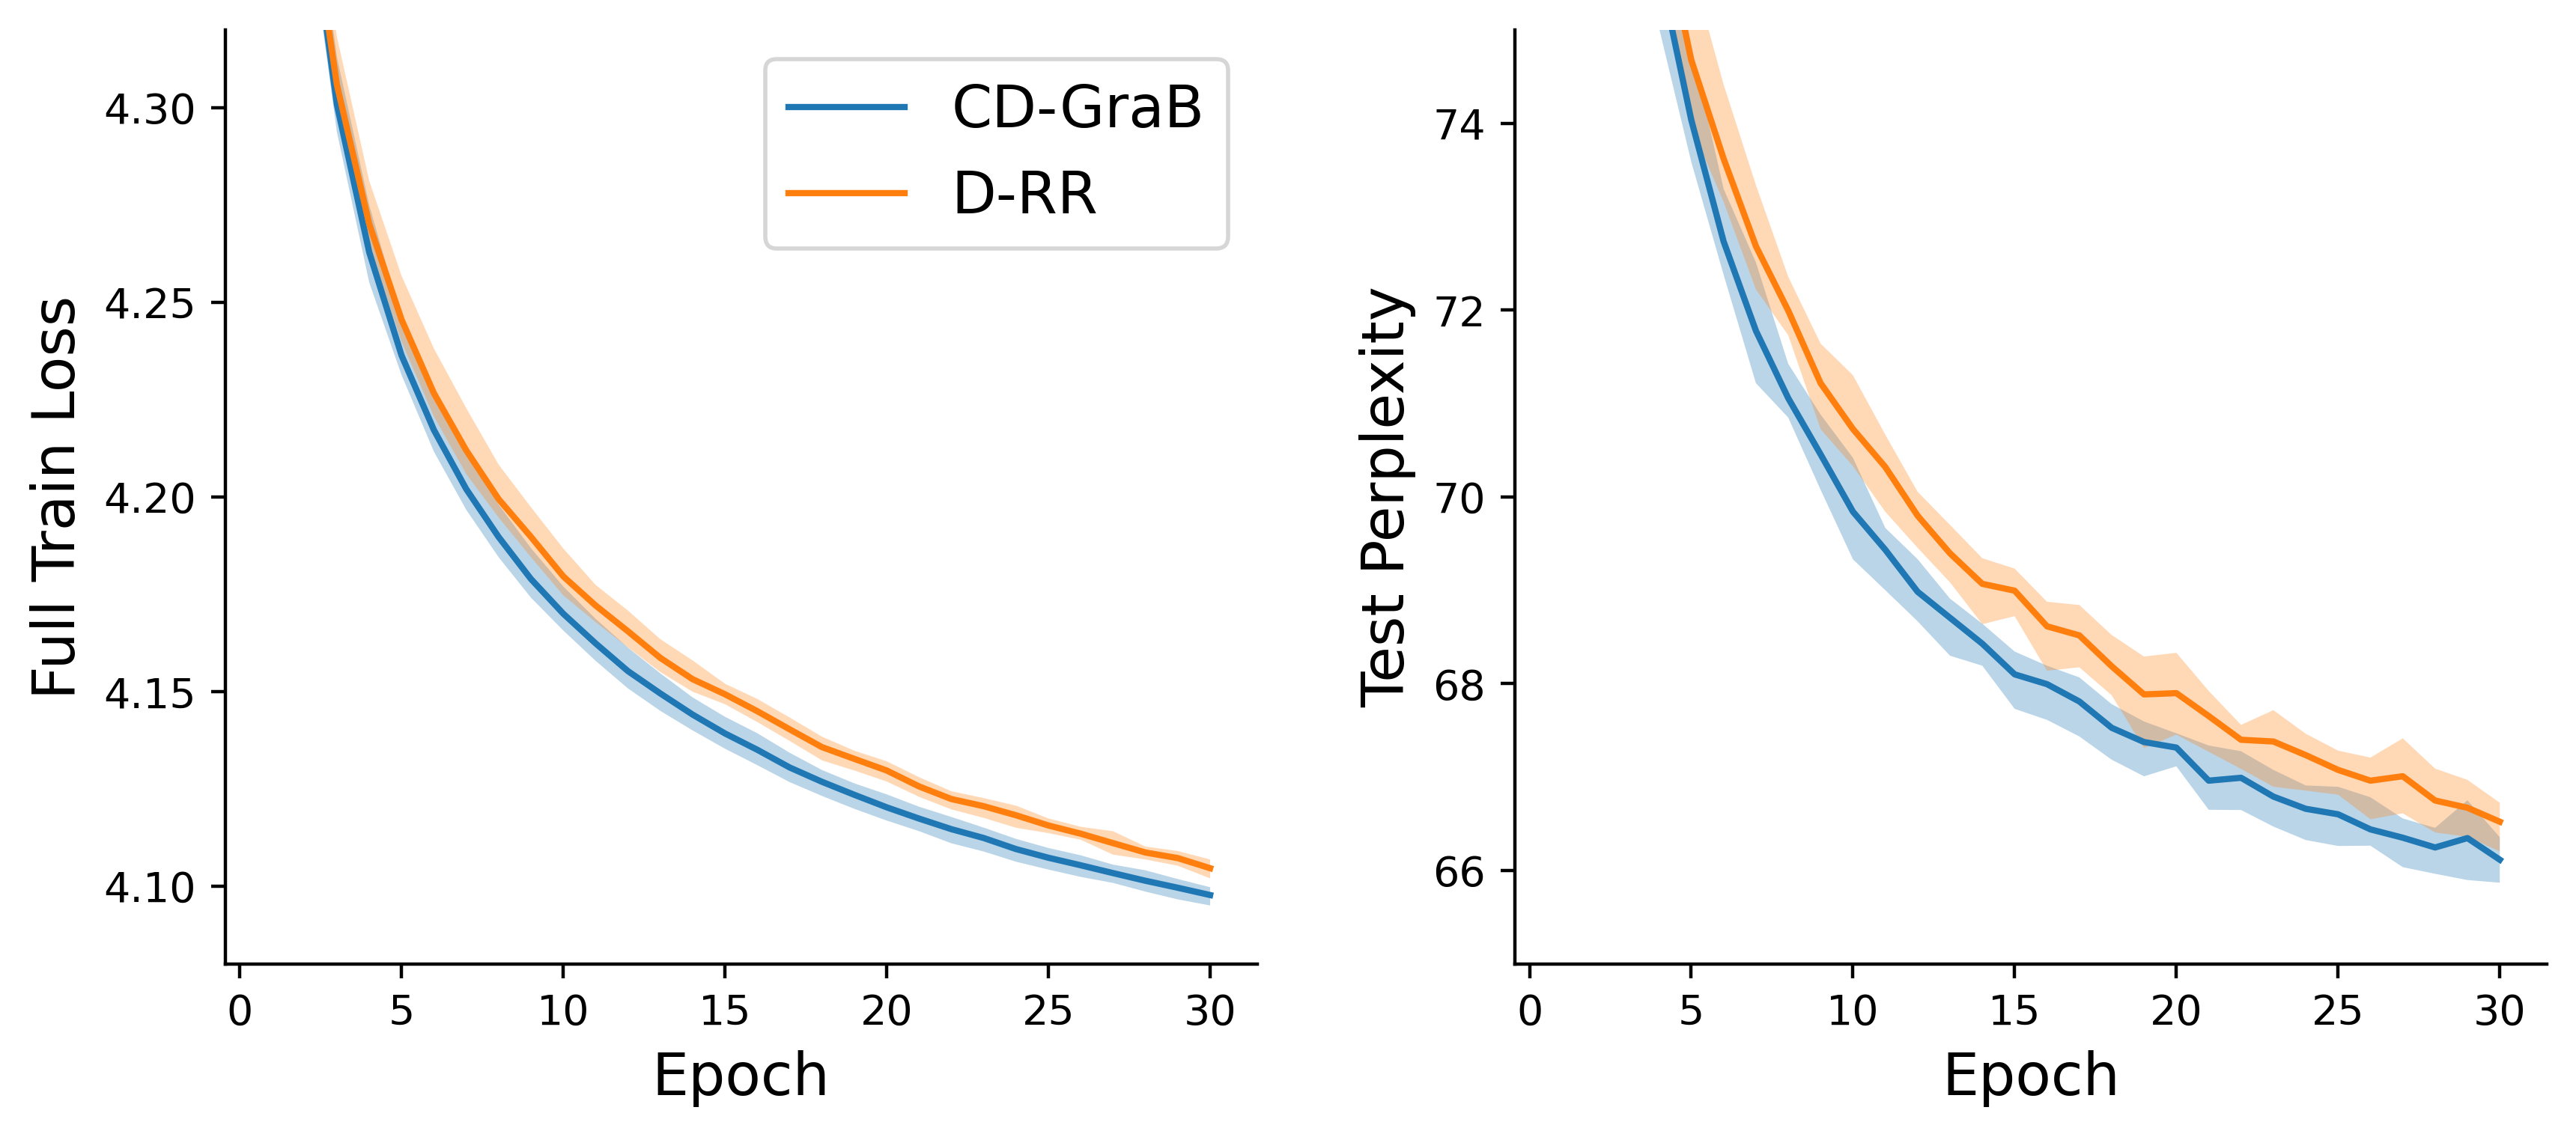

In [10]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), dpi=400, gridspec_kw=dict(wspace=0.25, bottom=0.1))

plot_res(axes[0], "CD-GraB", "CD-GraB", "train", "loss")
plot_res(axes[0], "D-RR", "D-RR", "train", "loss")

axes[0].legend(fontsize=14, loc='upper right')
axes[0].set_ylabel('Full Train Loss', fontsize=14)
axes[0].set_ylim(4.08, 4.32)
axes[0].set_xlabel('Epoch', fontsize=14)

plot_res(axes[1], "CD-GraB", "CD-GraB", "test", "ppl")
plot_res(axes[1], "D-RR", "D-RR", "test", "ppl")

# axes[1].set_yticks([68, 69, 70, 71, 72])
axes[1].set_ylabel('Test Perplexity', fontsize=14)
axes[1].set_ylim(65, 75)
axes[1].set_xlabel('Epoch', fontsize=14)
fig.tight_layout()
for ax in axes:
    ax.tick_params(axis='both', which='minor', labelsize=14)
    ax.spines[['right', 'top']].set_visible(False)

fig.savefig(f'../../graph/gpt2-wiki103-sim/gpt2-wiki103-sim.png')
fig.savefig(f'../../graph/gpt2-wiki103-sim/gpt2-wiki103-sim.pdf', format="pdf", bbox_inches="tight")
